In [17]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [18]:
data = pd.read_csv('QueryResults_2.csv')

In [19]:
data

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,pandas equivalent of np.where,<p><code>np.where</code> has the semantics of ...,<python><pandas><numpy><where-clause>,38579532,70,106887,17,1
1,The type system in Scala is Turing complete. P...,<p>There are claims that Scala's type system i...,<language-agnostic><scala><type-systems><turin...,4047512,57,7625,12,2
2,How can you publish a ClickOnce application th...,<p>I have CruiseControl.NET Version 1.4 set up...,<msbuild><clickonce><cruisecontrol.net><publish>,12482,24,12992,13,5
3,How do you get a directory listing in C?,<p>How do you scan a directory for folders and...,<c><file><directory><cross-platform><common-ta...,12489,65,135968,21,9
4,Expression Evaluation and Tree Walking using p...,"<p>This morning, I was reading <a href=""http:/...",<oop><recursion><polymorphism><binary-tree>,12516,27,7032,19,16
...,...,...,...,...,...,...,...,...
49995,Frontend javascript frameworks with node.js,<p>I am starting to learn frontend JavaScript ...,<javascript><node.js><backbone.js><ember.js><j...,14072131,30,29357,11,2
49996,WELD-001408: Unsatisfied dependencies for type...,<p>I'm a Java EE-newbie. I want to test JSF an...,<jsf><jakarta-ee><dependency-injection><cdi><m...,28352461,53,135308,12,7
49997,Optimize uploaded images with php (jpeg),<p>When running Page Speed in Google Chrome it...,<php><gd><jpeg><image-compression><image-optim...,14072456,16,40714,12,4
49998,Google Maps v2 - set both my location and zoom in,"<p>My question is, does anyone know how to set...",<android><api><google-maps><google-maps-api-2>,14074129,125,163166,41,11


### Les titres sont tout aussi important que le Body. Nous pouvons regrouper les deux. 

In [20]:
data.Body = data.Title + " " + data.Body 

In [21]:
data.Body

0        pandas equivalent of np.where <p><code>np.wher...
1        The type system in Scala is Turing complete. P...
2        How can you publish a ClickOnce application th...
3        How do you get a directory listing in C? <p>Ho...
4        Expression Evaluation and Tree Walking using p...
                               ...                        
49995    Frontend javascript frameworks with node.js <p...
49996    WELD-001408: Unsatisfied dependencies for type...
49997    Optimize uploaded images with php (jpeg) <p>Wh...
49998    Google Maps v2 - set both my location and zoom...
49999    post request with multiple parameters JSON and...
Name: Body, Length: 50000, dtype: object

## Gestion des TAGS ( cible ) 

#### Définition des fonction permettant de cleaner les TAGS

In [22]:
def tag_remover(tag):
    tag = tag.replace('>' , " ").replace('<', " ")
    return tag

def tag_to_word_list(tag):
    tag = BeautifulSoup(tag).get_text()
    tag = tag.split()
    return(tag)

#### Parcourons tous les TAGS pour leur appliquer nos fonctions de clean.

In [23]:
Tags = []
for tag in data.Tags:
    tag = tag_remover(tag)
    tag = tag_to_word_list(tag)
    Tags.append(tag)
    
tag_bank = [] 
for tag in Tags : 
    for y in tag:
        tag_bank.append(y)

#### Identifions, les TAGS les plus courants, cela pourra certainement nous être utile.

In [68]:
sns.set(font_scale = 1.3)

/Users/florentmargery/opt/anaconda3/envs/work_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


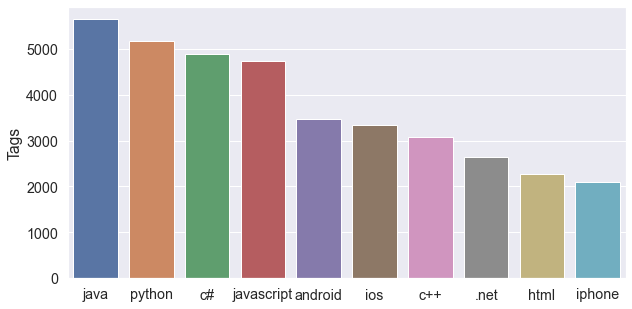

In [69]:
import matplotlib.pylab as plt
tags = pd.DataFrame()
tags['Tags'] = tag_bank
# for legend text
plt.figure(figsize = (10,5))

sns.barplot(tags['Tags'].value_counts().head(10).index,\
            tags['Tags'].value_counts().head(10))

top_ten = tags['Tags'].value_counts().head(10).index
top_ten_tags=[]
for i in range(len(top_ten)):
    top_ten_tags.append(top_ten[i])

In [26]:
tags['Tags'].value_counts().head(10).sum()

37339

In [59]:
#Création des data que nous utiliserons pour créer notre modèle supervisé
data_to_train = [] #--> X
target_to_train = [] #--> y
len_question = []
counter = 0
for tag in Tags:
    for i in tag:
        if i in top_ten_tags:            
            data_to_train.append(data.Body[counter])
            len_question.append(len(data.Body[counter]))
            target_to_train.append(i)
            
            
    counter+=1

In [60]:
for tag in top_ten:
    print(tag)
    top_ten_tags.append(tag)

java
python
c#
javascript
android
ios
c++
.net
html
iphone


In [61]:
len(len_question)

37339

#### Y-a-t-il une corrélation entre la taille des questions posées et les TAGS associés ? 

<AxesSubplot:>

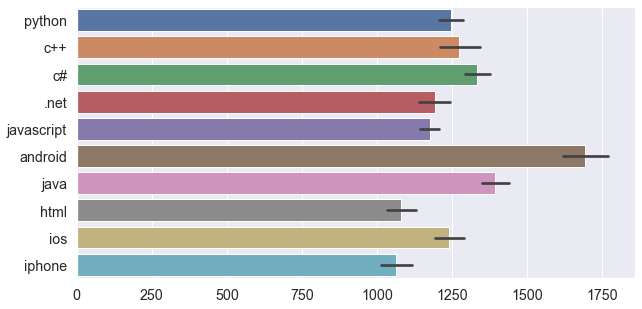

In [70]:
plt.figure(figsize = (10,5))

sns.barplot(x=len_question, y=target_to_train)